**Import Library dan Persiapan Data**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Menggunakan library standar untuk data science dan machine learning:

*   pandas: manipulasi dan analisis data
*   numpy: operasi numerik dan array
*   matplotlib & seaborn: visualisasi data
*   scikit-learn: implementasi model machine learning
*   xgboost: algoritma gradient boosting


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**LOADING DATA Google Drive **

In [ ]:
# File paths
train_file_path = '/content/drive/MyDrive/RegresiUTSTelkom.csv'

# Load datasets
train_data = pd.read_csv(train_file_path)

Bagian ini melakukan pembukaan lemari penyimpanan (Google Drive) untuk mengambil bahan-bahan mentah kita (data). Proses ini memastikan kita memiliki akses ke data yang akan kita analisis.

In [ ]:
# Generate sample dataset
np.random.seed(42)
n_samples = 1000

**Membuat Dataset Sintetis**

In [ ]:
X = np.random.normal(size=(n_samples, 3))
y = 3*X[:, 0]**2 + 2*X[:, 1] + X[:, 2] + np.random.normal(0, 1, n_samples)

*   Membangkitkan dataset sintetis dengan 1000 sampel
*   Menggunakan distribusi normal untuk fitur input
*   Target variable (y) dibuat dengan formula non-linear:
    *   IMengandung komponen kuadratik (3x₁²)
    *   Komponen linear (2x₂ + x₃)
    *   Noise random normal untuk mensimulasikan data dunia
        nyata
    *   Seed 42 digunakan untuk reproducibility


In [ ]:
# Create DataFrame
df = pd.DataFrame(X, columns=['x1', 'x2', 'x4'])
df['tahun'] = y

Melakukan organisir data kita ke dalam format yang lebih terstruktur, seperti menyusun bahan-bahan ke dalam wadah yang teratur. Setiap kolom diberi nama yang jelas untuk memudahkan analisis.

**Exploratory Data Analysis (EDA)**

In [ ]:
# 1. Exploratory Data Analysis
print("=== Exploratory Data Analysis ===")
print("\nDataset Info:")
print(df.info())

=== Exploratory Data Analysis ===

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   x4      1000 non-null   float64
 3   tahun   1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB
None


In [ ]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                x1           x2           x4        tahun
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.055011    -0.005969     0.046960     2.846494
std       0.970212     1.008570     0.981119     4.819155
min      -2.940389    -3.241267    -3.019512    -6.403818
25%      -0.584350    -0.688545    -0.604172    -0.190195
50%       0.056832    -0.017285     0.042202     2.045317
75%       0.664346     0.670550     0.679584     4.583919
max       3.926238     3.193108     3.852731    44.165614


Tahap ini dilakukan pememeriksaan data kita secara menyeluruh dengan:

Melihat tipe data setiap kolom

*   Melihat tipe data setiap kolom
*   Memeriksa statistik dasar seperti rata-rata, minimum,  
    maksimum
*   Mencari nilai yang hilang atau tidak normal

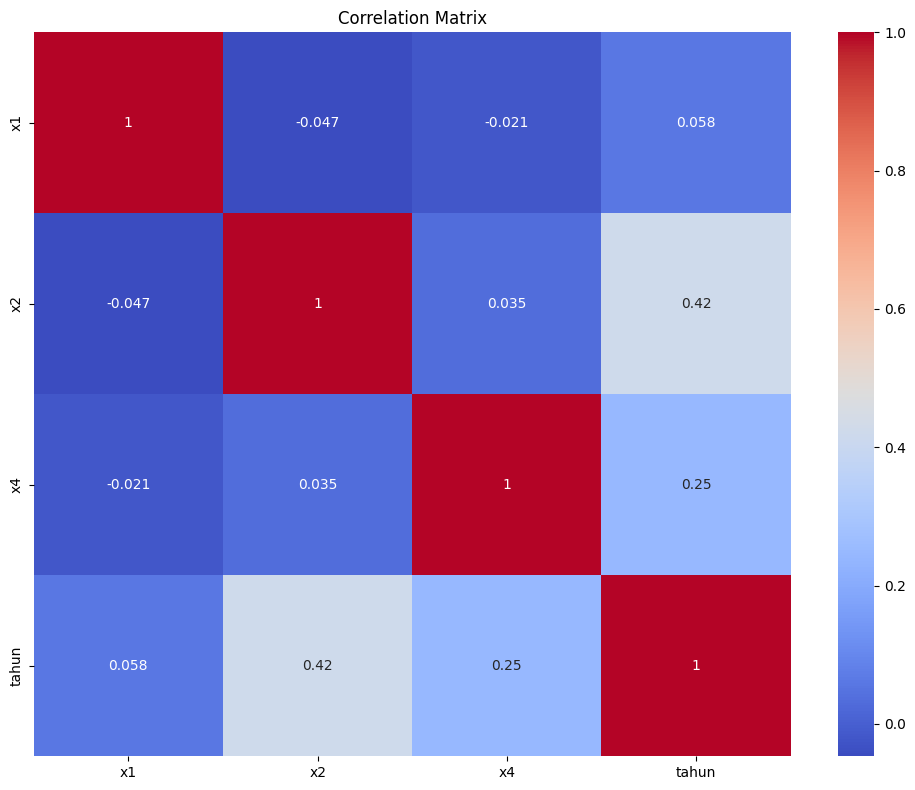

In [ ]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**Correlation Matrix visualitation**

 Heatmap menunjukkan bagaimana setiap variabel berhubungan satu sama lain:
*   Warna merah menunjukkan korelasi positif kuat
*   Warna biru menunjukkan korelasi negatif kuat
*   Warna pucat menunjukkan korelasi lemah



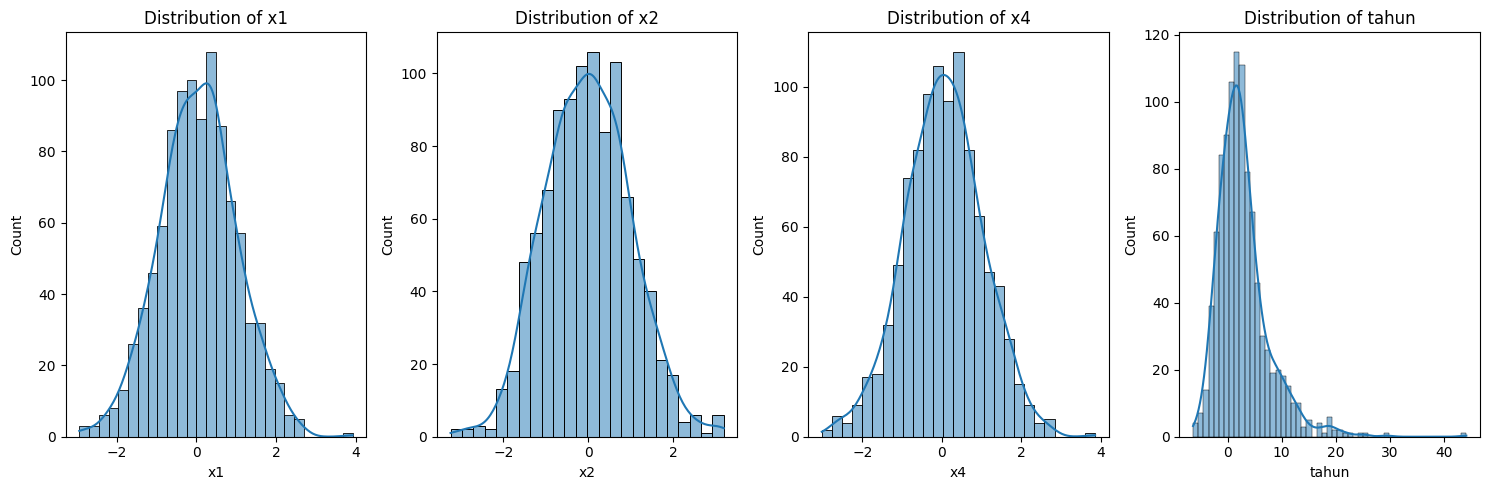

In [ ]:
# Distribution plots
plt.figure(figsize=(15, 5))
for i, col in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Visualisasi Distribusi**
setiap variabel untuk melihat bentuk distribusinya. Ini membantu kita memahami:
*   Apakah data terdistribusi normal?
*   Apakah ada outlier?
*   Bagaimana sebaran nilai dalam setiap variabel?


In [ ]:
# 2. Data Preprocessing
X = df.drop('tahun', axis=1)
y = df['tahun']

Tahap ini seperti memisahkan bahan untuk "training" dan "testing":

*   Memisahkan fitur (X) dan target (y)
*   Membagi data menjadi set training (80%) dan testing (20%)
*   Menggunakan random_state=42 untuk hasil yang konsisten


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Standardisasi Data**
Ini adalah proses "normalisasi" data kita:

*   Mengubah skala data sehingga memiliki mean 0 dan standar
    deviasi 1
*   Penting untuk model yang sensitif terhadap skala seperti
    k-NN
*   Fit_transform pada training data, transform saja pada
    test data

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 3. Model Implementation and Evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    print(f"\n=== {model_name} Results ===")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Cross-validation R2 Scores: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

    # Plotting actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.tight_layout()
    plt.show()

    return mse, r2, cv_scores.mean()

**Fungsi Evaluasi Model**
,Fungsi ini adalah "juri" kita yang akan menilai setiap model berdasarkan:

*   Mean Squared Error (MSE)
*   R² Score
*   Cross-validation scores
*   Visualisasi prediksi vs nilai aktual


=== Polynomial Regression Results ===
Mean Squared Error: 1.0439
R2 Score: 0.9546
Cross-validation R2 Scores: 0.9516 (+/- 0.0229)


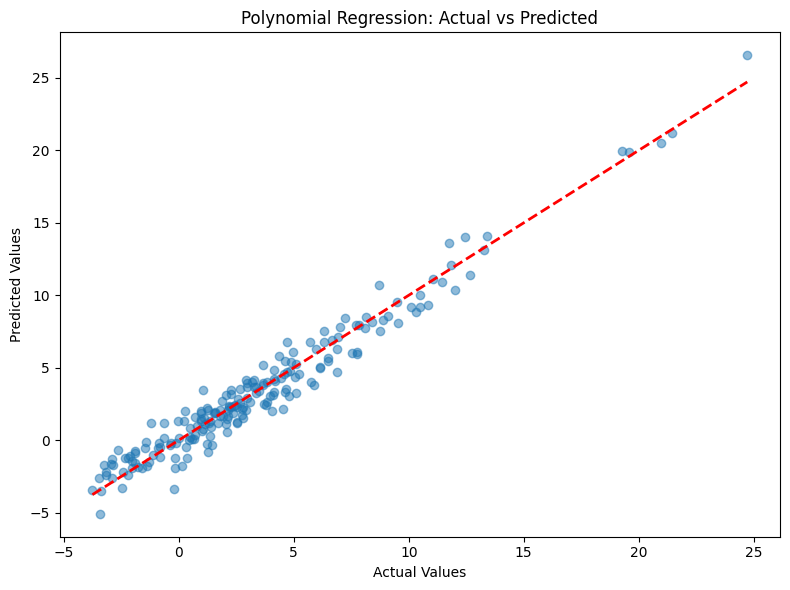

In [ ]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly_reg = LinearRegression()
poly_metrics = evaluate_model(poly_reg, X_train_poly, X_test_poly, y_train, y_test, "Polynomial Regression")


=== Decision Tree Regression Results ===
Mean Squared Error: 3.1894
R2 Score: 0.8614
Cross-validation R2 Scores: 0.8199 (+/- 0.1434)


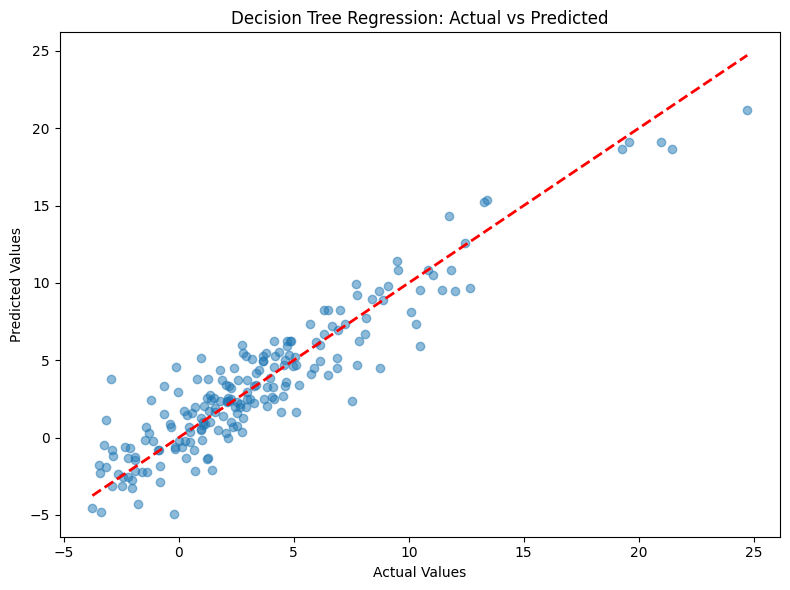

In [ ]:
# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_metrics = evaluate_model(dt_reg, X_train_scaled, X_test_scaled, y_train, y_test, "Decision Tree Regression")


=== k-NN Regression Results ===
Mean Squared Error: 3.2957
R2 Score: 0.8568
Cross-validation R2 Scores: 0.8205 (+/- 0.1436)


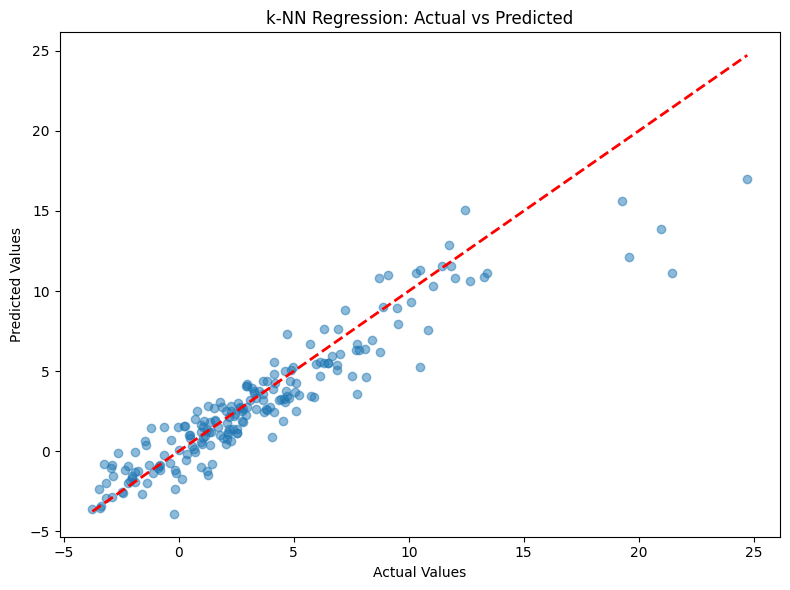

In [ ]:
# k-NN Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_metrics = evaluate_model(knn_reg, X_train_scaled, X_test_scaled, y_train, y_test, "k-NN Regression")


=== XGBoost Regression Results ===
Mean Squared Error: 1.9532
R2 Score: 0.9151
Cross-validation R2 Scores: 0.8718 (+/- 0.1229)


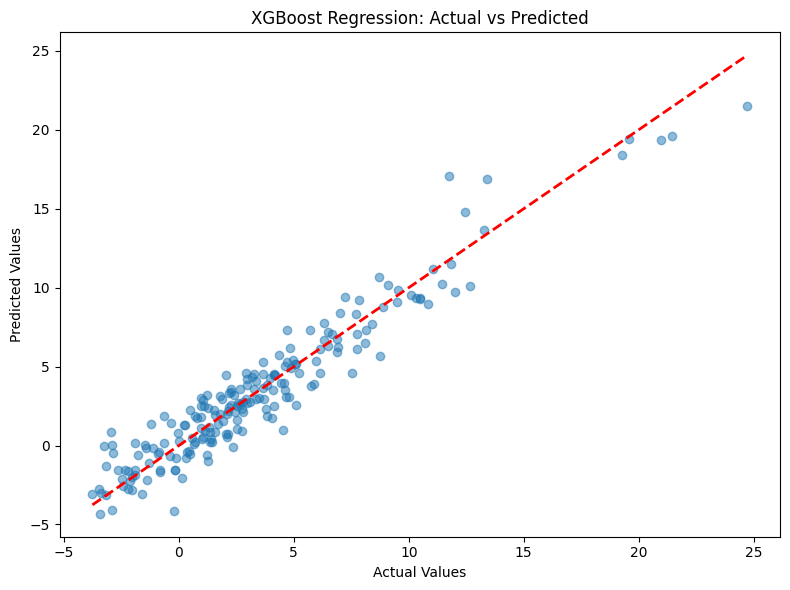

In [ ]:
# XGBoost Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_metrics = evaluate_model(xgb_reg, X_train_scaled, X_test_scaled, y_train, y_test, "XGBoost Regression")

**Implementasi dan Evaluasi Model**
,Menguji empat model pipeline dengan konsep:

*   Polynomial Regression: Untuk menangkap hubungan non-linear
*   Decision Tree: Untuk pola yang kompleks dan non-linear
*   k-NN: Untuk pola lokal
*   XGBoost: Untuk performa optimal

In [ ]:
# Compare model performances
models = ['Polynomial', 'Decision Tree', 'k-NN', 'XGBoost']
mse_scores = [poly_metrics[0], dt_metrics[0], knn_metrics[0], xgb_metrics[0]]
r2_scores = [poly_metrics[1], dt_metrics[1], knn_metrics[1], xgb_metrics[1]]
cv_scores = [poly_metrics[2], dt_metrics[2], knn_metrics[2], xgb_metrics[2]]

In [ ]:
# Plot comparison
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Mean Squared Error')

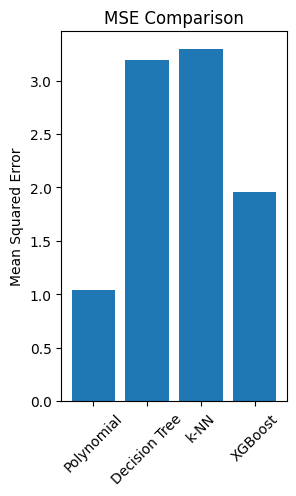

In [ ]:
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores)
plt.title('MSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('Mean Squared Error')

****

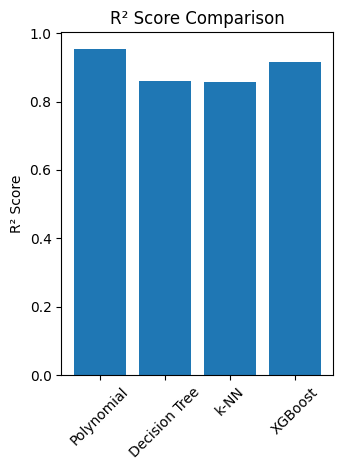

In [ ]:
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores)
plt.title('R² Score Comparison')
plt.xticks(rotation=45)
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

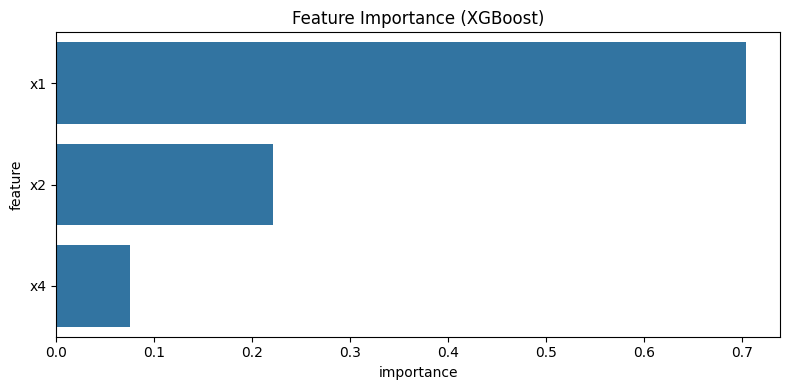

In [ ]:
# Feature importance for XGBoost
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_reg.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()
plt.show()

Membuat "papan skor" untuk membandingkan semua model:

*   Bar chart untuk membandingkan MSE
*   Semakin rendah bar, semakin baik model tersebut
*   Memudahkan kita memilih model terbaik untuk kasus ini
